In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD, Adagrad, RMSprop
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale, MinMaxScaler, StandardScaler
%matplotlib inline

# Linear Algebra with Numpy

In [2]:
a = np.array([1,2,3,4])

In [4]:
print(a)
print(type(a))

[1 2 3 4]
<class 'numpy.ndarray'>


In [10]:
A = np.array([[3,1,2],[2,3,4]])
B = np.array([[0,1],[2,3],[4,5]])
C = np.array([[0,1],[2,3],[4,5],[0,1],[2,3],[4,5]])

In [14]:
print("A is an {} array".format(A.shape))
print("B is an {} array".format(B.shape))
print("C is an {} array".format(C.shape))

A is an (2, 3) array
B is an (3, 2) array
C is an (6, 2) array


In [15]:
A[0]

array([3, 1, 2])

In [17]:
A[0,2]

2

In [18]:
B[1,1]

3

In [19]:
C[3,1]

1

In [20]:
C[2:]

array([[4, 5],
       [0, 1],
       [2, 3],
       [4, 5]])

In [21]:
C[2:4]

array([[4, 5],
       [0, 1]])

In [22]:
A*4

array([[12,  4,  8],
       [ 8, 12, 16]])

In [25]:
A*A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [26]:
A+A

array([[6, 2, 4],
       [4, 6, 8]])

In [27]:
A/A

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [28]:
A-A

array([[0, 0, 0],
       [0, 0, 0]])

In [29]:
A-B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [30]:
A*B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

# Dot Product

In [31]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [32]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [33]:
np.dot(A,B)

array([[10, 16],
       [22, 31]])

In [34]:
np.dot(B, A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [35]:
print(A.shape)
print(C.shape)

(2, 3)
(6, 2)


In [36]:
A.dot(C) #(2,3).(6,2) doesn't work

ValueError: shapes (2,3) and (6,2) not aligned: 3 (dim 1) != 6 (dim 0)

In [37]:
C.dot(A) #(6,2).(2,3) works and gives a (6,3)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

# tensors

In [38]:
x = np.array(12)

In [39]:
x

array(12)

In [41]:
x.ndim

0

In [42]:
x = np.array([12, 3, 6, 14])

In [43]:
x.ndim

1

In [44]:
x = np.array([[5, 78, 2, 34, 0],
                  [6, 79, 3, 35, 1],
                  [7, 80, 4, 36, 2]])

In [45]:
x.ndim

2

In [46]:
x = np.array([[[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                    [[5, 78, 2, 34, 0],
                     [6, 79, 3, 35, 1],
                    [7, 80, 4, 36, 2]],
                    [[5, 78, 2, 34, 0],
                     [6, 79, 3, 35, 1],
                     [7, 80, 4, 36, 2]]])

In [47]:
x.ndim

3

In [49]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [51]:
train_images.shape

(60000, 28, 28)

In [56]:
#train_images[4,]

In [50]:
digit = train_images[4]

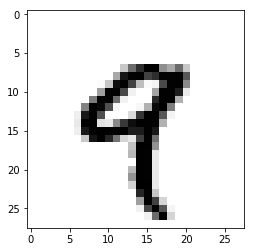

In [57]:
plt.imshow(digit, cmap=plt.cm.binary)

In [58]:
my_slice = train_images[10:100]
print(my_slice.shape) # 90 samples of 28x28

(90, 28, 28)


In [60]:
my_slice = train_images[10:100, :, :] # same as above
my_slice.shape

(90, 28, 28)

In [61]:
my_slice = train_images[10:100, 0:28, 0:28] # also same as above
my_slice.shape

(90, 28, 28)

# Gradient Descent: Bank Notes

In [62]:
df = pd.read_csv("../data/banknotes.csv")

In [63]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variace     1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [65]:
df.describe()

,variace,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


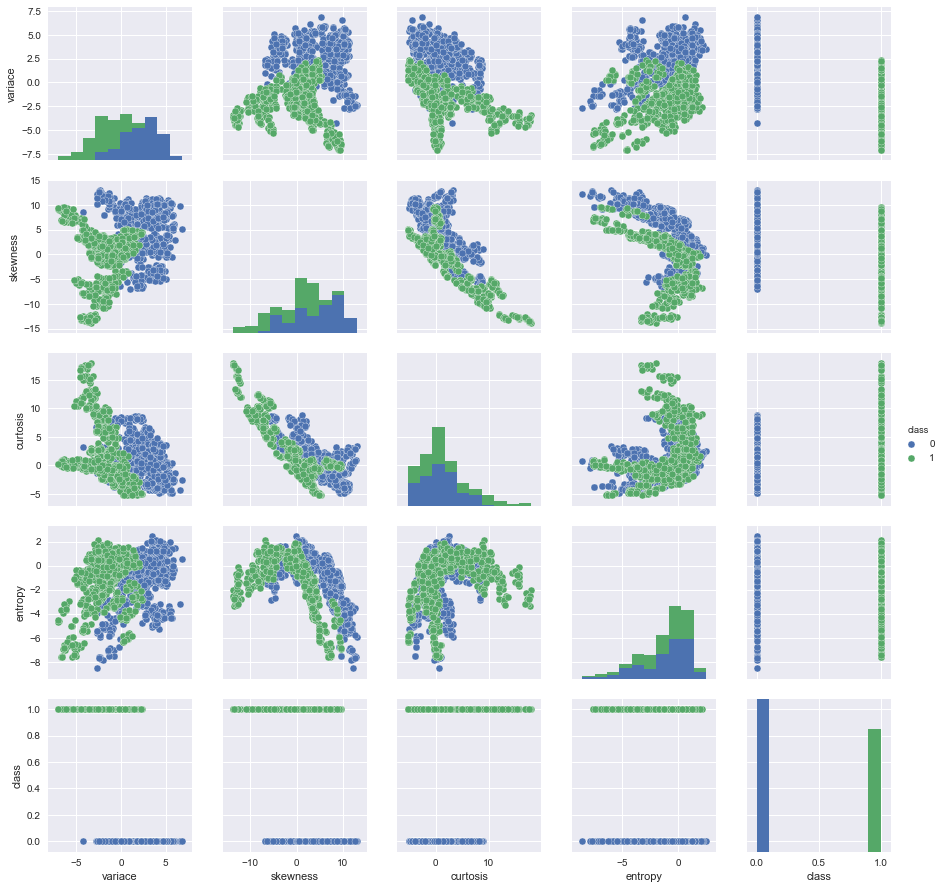

In [71]:
plt.figure(figsize=(8,8));
sns.pairplot(df, hue="class");

In [72]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [75]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [77]:
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
print(cross_val_score(rf_model, X, y))
print(cross_val_score(gb_model, X, y))

[ 0.99344978  0.98905908  0.99562363]
[ 0.99781659  0.98905908  0.99781182]


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
K.clear_session() # Destroys the current TF graph and creates a new one.
model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20) # save the accuracy and loss and create a df below
result = model.evaluate(X_test, y_test)

Epoch 1/20
960/960 [==============================] - 0s - loss: 0.5701 - acc: 0.6573     
Epoch 2/20
960/960 [==============================] - 0s - loss: 0.5305 - acc: 0.6802     
Epoch 3/20
960/960 [==============================] - 0s - loss: 0.4959 - acc: 0.7094     
Epoch 4/20
960/960 [==============================] - 0s - loss: 0.4657 - acc: 0.7458     
Epoch 5/20
960/960 [==============================] - 0s - loss: 0.4395 - acc: 0.7667     
Epoch 6/20
960/960 [==============================] - 0s - loss: 0.4169 - acc: 0.7812     
Epoch 7/20
960/960 [==============================] - 0s - loss: 0.3973 - acc: 0.8250     
Epoch 8/20
960/960 [==============================] - 0s - loss: 0.3802 - acc: 0.8583     
Epoch 9/20
960/960 [==============================] - 0s - loss: 0.3654 - acc: 0.8833     
Epoch 10/20
960/960 [==============================] - 0s - loss: 0.3524 - acc: 0.9010     
Epoch 11/20
960/960 [==============================] - 0s - loss: 0.3409 - acc: 0.9083   

In [87]:
history_df = pd.DataFrame(history.history, index=history.epoch)

In [88]:
history_df.head()

,acc,loss
0,0.657292,0.570131
1,0.680208,0.530524
2,0.709375,0.495868
3,0.745833,0.465666
4,0.766667,0.439520


In [98]:
result

[0.28051552031804056, 0.94174757107947638]

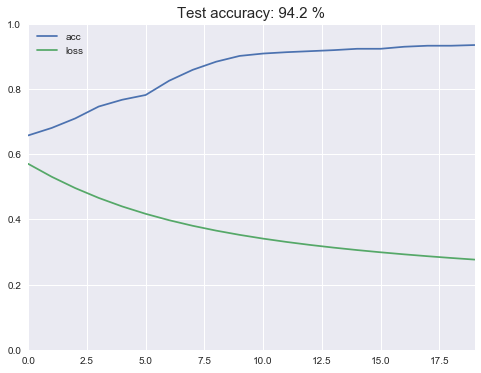

In [97]:
history_df.plot(ylim=(0,1), figsize=(8,6))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15);

In [100]:
model.metrics_names

['loss', 'acc']

# Learning Rates

In [131]:
hist_list = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:
    K.clear_session()
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=lr), metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0, epochs=20)
    hist_list.append(pd.DataFrame(h.history, index=h.epoch))

In [132]:
history_df = pd.concat(hist_list, axis=1)
metrics_reported = hist_list[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported])
history_df.columns = idx

In [137]:
history_df.head()

0.01                0.05                0.10                0.50  \
        acc      loss       acc      loss       acc      loss       acc   
0  0.740625  0.468614  0.546875  0.751160  0.537500  0.689292  0.925000   
1  0.790625  0.421900  0.907292  0.398439  0.834375  0.380288  0.968750   
2  0.846875  0.386532  0.926042  0.305317  0.911458  0.278578  0.973958   
3  0.881250  0.359489  0.944792  0.260193  0.942708  0.222498  0.978125   
4  0.897917  0.338365  0.948958  0.230795  0.955208  0.187421  0.978125   

             
       loss  
0  0.249085  
1  0.118841  
2  0.091349  
3  0.078383  
4  0.070102

In [136]:
#history_df.xs('loss', axis=1, level=1)

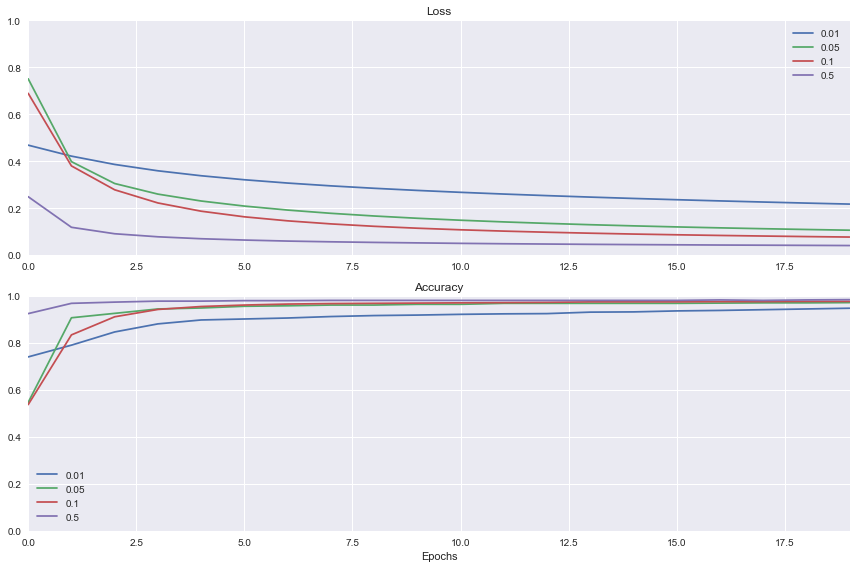

In [135]:
plt.figure(figsize=(12,8))
ax = plt.subplot(211)
history_df.xs('loss', axis=1, level=1).plot(ylim=(0,1),ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
history_df.xs('acc', axis=1, level=1).plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.tight_layout()

# Batch Sizes

In [138]:
hist_list = []

batch_sizes = [16,32,64,128]

for bs in batch_sizes:
    K.clear_session()
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=bs, verbose=0, epochs=20)
    hist_list.append(pd.DataFrame(h.history, index=h.epoch))

In [139]:
history_df = pd.concat(hist_list, axis=1)
metrics_reported = hist_list[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported], names=['batch_size', 'metric'])
history_df.columns = idx

In [141]:
history_df.head()

batch_size       16                  32                  64             \
metric           acc      loss       acc      loss       acc      loss   
0           0.264583  1.606611  0.782292  0.501973  0.575000  0.696714   
1           0.301042  1.247689  0.786458  0.485804  0.580208  0.671702   
2           0.366667  0.963386  0.801042  0.471144  0.593750  0.648075   
3           0.492708  0.757925  0.809375  0.457816  0.612500  0.625877   
4           0.681250  0.619670  0.815625  0.445633  0.628125  0.605099   

batch_size       128            
metric           acc      loss  
0           0.198958  1.170926  
1           0.203125  1.135744  
2           0.215625  1.102372  
3           0.223958  1.070161  
4           0.240625  1.039362

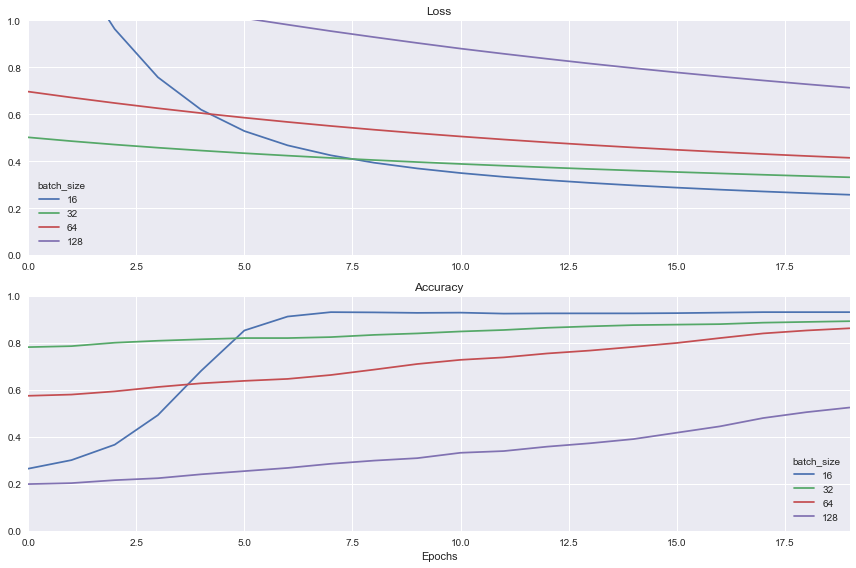

In [142]:
plt.figure(figsize=(12,8))
ax = plt.subplot(211)
history_df.xs('loss', axis=1, level=1).plot(ylim=(0,1),ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
history_df.xs('acc', axis=1, level=1).plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.tight_layout()

# Exponential Weighted Moving Average (EWMA)
### Recursive mixing and Smoothing

### Optimizers
* SGD 
* SGD with momentum (smooth updates)
* SGD with Nesterov momentum (interim calc gradient + smooth)

Adaptive Algorithms
* AdaGrad (Adaptive correction using Squared Gradient)
* RMSProp (EWMA applied to squared gradient adagrad)
* Adam (Adaptive, use EWMA on graient and square of gradient moments)

In [151]:
dflist = []

optimizers = ['SGD(lr=0.01)', 
              'SGD(lr=0.01, momentum=0.3)',
             'SGD(lr=0.01, momentum=0.3, nesterov=True)',
             'Adam(lr=0.01)',
             'Adagrad(lr=0.01)',
             'RMSprop(lr=0.01)']

for opt_name in optimizers:
    K.clear_session()
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=eval(opt_name), metrics=['accuracy']) # use eval() since you are passing a funct
    h = model.fit(X_train, y_train, batch_size=16, verbose=0, epochs=20)
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [152]:
history_df = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported], names=['optimizer', 'metric'])
history_df.columns = idx

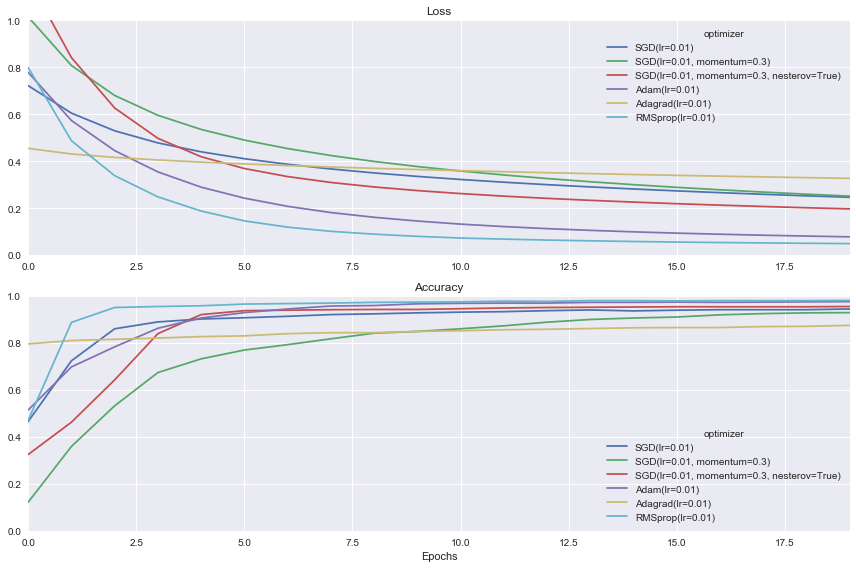

In [154]:
plt.figure(figsize=(12,8))
ax = plt.subplot(211)
history_df.xs('loss', axis=1, level=1).plot(ylim=(0,1),ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
history_df.xs('acc', axis=1, level=1).plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.tight_layout()

# Initialization
https://keras.io/initializers

In [159]:
dflist = []

initializers = ['zeros',
               'uniform',
               'normal',
               'he_normal', 
               'lecun_uniform']

for init in initializers:
    K.clear_session()
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), kernel_initializer=init, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0, epochs=20)
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [160]:
history_df = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported], names=['initializer', 'metric'])
history_df.columns = idx

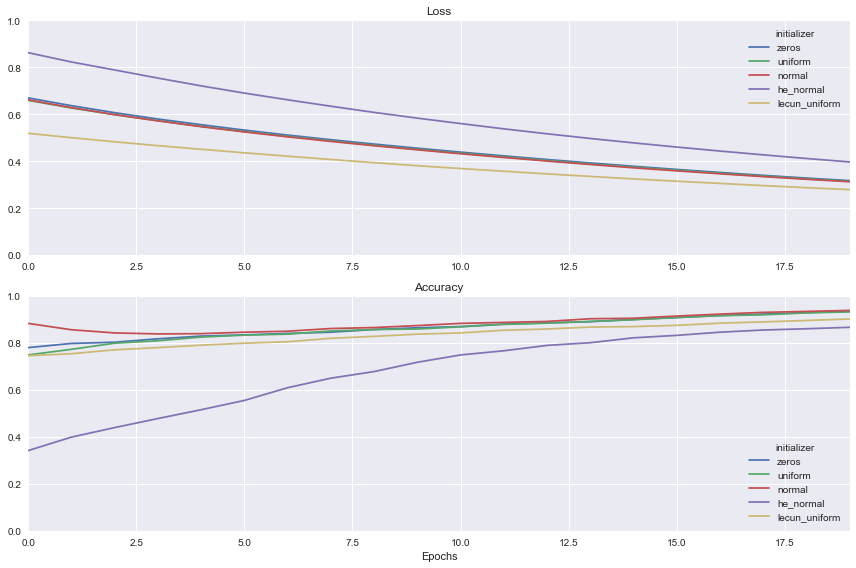

In [161]:
plt.figure(figsize=(12,8))
ax = plt.subplot(211)
history_df.xs('loss', axis=1, level=1).plot(ylim=(0,1),ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
history_df.xs('acc', axis=1, level=1).plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.tight_layout()

# Inner layer representation

In [ ]:
K.clear_session()
model = Sequential()
model